<a href="https://colab.research.google.com/github/Vishu31k/IML-Project/blob/main/IMAGE_CLASSIFICATION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 54ms/step - accuracy: 0.8736 - loss: 0.4198 - val_accuracy: 0.9828 - val_loss: 0.0599
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9817 - loss: 0.0607 - val_accuracy: 0.9865 - val_loss: 0.0470
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.9882 - loss: 0.0399 - val_accuracy: 0.9887 - val_loss: 0.0396
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.9907 - loss: 0.0298 - val_accuracy: 0.9888 - val_loss: 0.0424
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.9930 - loss: 0.0220 - val_accuracy: 0.9900 - val_loss: 0.0396
313/313 - 2s - 8ms/step - accuracy: 0.9908 - loss: 0.0265
Test accuracy: 0.9908


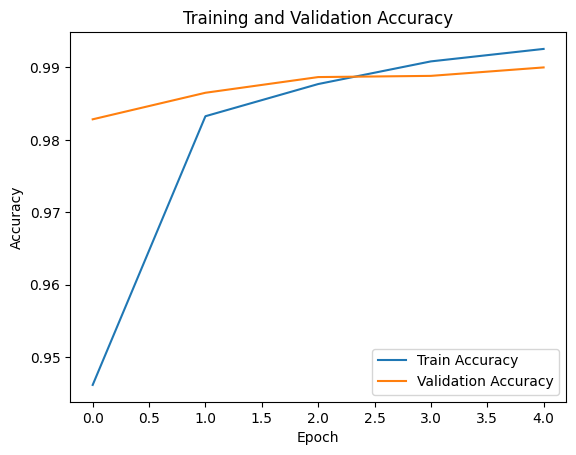

In [ ]:
# Task 3: CNN for Image Classification (MNIST Digits)

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset (handwritten digits)
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape data to add channel dimension (required for CNN)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Build CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
